In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
################################################################
################################################################
# Gerenate stock paths using binomial model
T = 1 # time to maturity
sigma = 0.5 # volatility of stock price
r = 0.5 * (sigma**2) # risk-free rate
S0 = 1 # initial stock price
def binomial_GBM(T, N, r, sigma, S0):
    dt = T / N
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    p = (np.exp(r*dt)-d) / (u-d) # risk neutral prability for option pricing
    
    # stock price dynamics
    stock_price = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock_price[j,i] = (d**j) * (u**(i-j)) * S0
    return stock_price      

In [10]:
# number of steps
N = 6
tree = binomial_GBM(T, N, r, sigma, S0)
# print('Step Number=6: \n', np.round(tree,5))

In [11]:
# convert binomial tree to all possible paths
from itertools import product
a = np.array(list(product((0, 1), repeat=N)))
a = np.c_[[0] * (2**N), a]
a = a.cumsum(axis=1)
b = np.choose(a,tree)
stock_paths1 = b[:,1:]
# print('All possible price paths: \n', np.round(b, 4))

In [12]:
# minimum price during the period
min_price1 = stock_paths1.min(axis=1)
# print('Min price: \n', np.round(min_price, 4))

In [13]:
# find optimal buying strategy
import scipy.optimize as sco
P = stock_paths1
m = min_price1

# ##############################################################################################
# # Minimize expected regret
# def min_regret(w):
#     w = np.array(w)
#     return np.sum(((P*w).sum(axis=1) / m)) + (sum(w)-1)**4
# # constraints：sum of weights are 1
# cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1})
# # boundaries：each weight is bewtween 0 and 1
# bnds = tuple((0,1) for j in range(N))
# # guess initial weights
# ini = np.array([1/N] * N)
# # implement function
# result1 = sco.minimize(fun=min_regret, x0=ini, method='SLSQP', constraints=cons, bounds=bnds)
# strategy1 = result1['x'].round(4)
# print('Min Expected Regret: \n', strategy1)

In [14]:
# ##############################################################################################
# # Minimize max of regret
# def min_regret(w):
#     w = np.array(w)
#     return ((P*w).sum(axis=1) / m).max()
# # constraints：sum of weights are 1
# cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1})
# # boundaries：each weight is bewtween 0 and 1
# bnds = tuple((0,1) for j in range(N))
# # guess initial weights
# ini = np.array([1/N] * N)
# # implement function
# result2 = sco.minimize(fun=min_regret, x0=ini, method='SLSQP', constraints=cons, bounds=bnds)
# strategy2 = result2['x'].round(4)
# print('Min Max Regret: \n', strategy2)

In [15]:
##############################################################################################
# Minimize std of regret
def min_regret(w):
    w = np.array(w)
    return ((P*w).sum(axis=1) / m).std()

# constraints：sum of weights are 1
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1})

# boundaries：each weight is bewtween 0 and 1
bnds = tuple((0,1) for j in range(N))

# guess initial weights
ini = np.array([1/N] * N)
# ini = np.array([0.18,0.181,0.12,0.12,0.181,0.18])

# implement function
result3 = sco.minimize(fun=min_regret, x0=ini, method='SLSQP', constraints=cons, bounds=bnds)
# print(result3)
strategy3 = result3['x'].round(4)
print('Min Std Regret for 50% Vol: \n', strategy3)

Min Std Regret for 50% Vol: 
 [0.143  0.1908 0.1662 0.1662 0.1908 0.143 ]


In [16]:
# regret
regret = ((P*strategy3).sum(axis=1) / m).round(4)
print('All possible regret: \n', regret)

All possible regret: 
 [1.7621 1.6291 1.4844 1.396  1.3816 1.2932 1.197  1.396  1.2978 1.2094
 1.1132 1.2932 1.2815 1.2094 1.3871 1.6291 1.4955 1.3871 1.2691 1.197
 1.1853 1.1132 1.2691 1.4844 1.3699 1.2815 1.1853 1.3816 1.3699 1.2978
 1.4955 1.7621 1.7621 1.6291 1.4844 1.396  1.3816 1.2932 1.197  1.396
 1.2978 1.2094 1.1132 1.2932 1.2815 1.2094 1.3871 1.6291 1.4955 1.3871
 1.2691 1.197  1.1853 1.1132 1.2691 1.4844 1.3699 1.2815 1.1853 1.3816
 1.3699 1.2978 1.4955 1.7621]


In [17]:
# plt.hist(regret, bins='auto')

Text(0.5, 1.0, 'Optimal Strategy for N=6 using Binomial Tree')

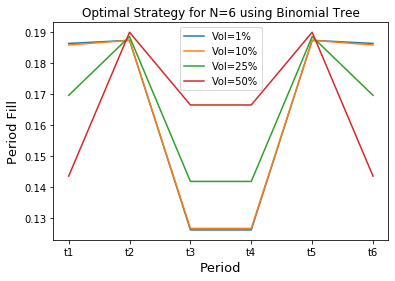

In [18]:
# Optimal Strategy for N=6
data = {'Vol=1%': [0.1863, 0.1873, 0.1263, 0.1263, 0.1873, 0.1863],
       'Vol=10%': [0.1858, 0.1873, 0.1268, 0.1268, 0.1873, 0.1858],
       'Vol=25%': [0.1696, 0.1885, 0.1419, 0.1419, 0.1885, 0.1696],
       'Vol=50%': [0.1436, 0.1899, 0.1665, 0.1665, 0.1899, 0.1436]}
df = pd.DataFrame(data, index=['t1','t2','t3','t4','t5','t6'])

# Plot for Optimal Strategy when N=6
a = plt.plot(df)
plt.legend(a, df.columns)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=6 using Binomial Tree')

Text(0.5, 1.0, 'Optimal Strategy for N=15 using Binomial Tree')

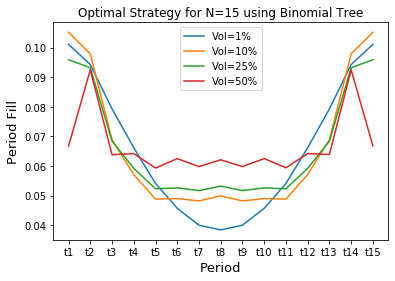

In [19]:
# Optimal Strategy for N=15
data = {'Vol=1%': [0.1011, 0.0943, 0.0793, 0.0662, 0.0541, 0.0457, 0.04, 0.0384, 0.04,   0.0457,
 0.0541, 0.0662, 0.0793, 0.0943, 0.1011],
       'Vol=10%': [0.1052, 0.0979, 0.0689, 0.0571, 0.0488, 0.049, 0.0482, 0.0499, 0.0482, 0.049,
 0.0488, 0.0571, 0.0689, 0.0979, 0.1052],
       'Vol=25%': [0.0959, 0.0932, 0.0684, 0.0592, 0.0523, 0.0526, 0.0517, 0.0532, 0.0517, 0.0526,
 0.0523, 0.0592, 0.0684, 0.0932, 0.0959],
       'Vol=50%': [0.0667, 0.0925, 0.0638, 0.0642, 0.0593, 0.0625, 0.0598, 0.0621, 0.0598, 0.0625,
 0.0594, 0.0642, 0.0639, 0.0925, 0.0668]}
df=pd.DataFrame(data, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15'])

# Plot for Optimal Strategy when N=15
a = plt.plot(df)
plt.legend(a, df.columns)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=15 using Binomial Tree')

Text(0.5, 1.0, 'Optimal Strategy for N=20 using Binomial Tree')

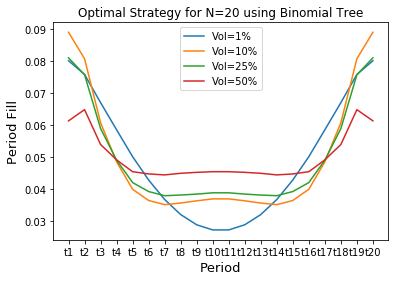

In [20]:
# Optimal Strategy for N=20
data = {'Vol=1%': [0.0802, 0.0759, 0.0671, 0.0586, 0.0502, 0.0429, 0.0368, 0.0321, 0.0289, 0.0273,
 0.0273, 0.0289, 0.0321, 0.0368, 0.0429, 0.0502, 0.0586, 0.0671, 0.0759, 0.0802],
       'Vol=10%': [0.0891, 0.0808, 0.0608, 0.0486, 0.04,   0.0365, 0.0352, 0.0357, 0.0364, 0.037,
 0.037,  0.0364, 0.0357, 0.0352, 0.0365, 0.04,   0.0486, 0.0608, 0.0808, 0.0891],
       'Vol=25%': [0.0811, 0.0758, 0.059,  0.0491, 0.0421, 0.0393, 0.038,  0.0382, 0.0385, 0.0389,
 0.0389, 0.0385, 0.0382, 0.038,  0.0393, 0.0421, 0.0491, 0.059,  0.0758, 0.0811],
       'Vol=50%': [0.0614, 0.0649, 0.054,  0.0492, 0.0455, 0.0448, 0.0445, 0.045,  0.0453, 0.0455,
 0.0455, 0.0453, 0.045,  0.0445, 0.0448, 0.0455, 0.0492, 0.054,  0.0649, 0.0614]}
df=pd.DataFrame(data, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15','t16','t17','t18','t19','t20'])

# Plot for Optimal Strategy when N=20
a = plt.plot(df)
plt.legend(a, df.columns)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=20 using Binomial Tree')

In [31]:
#########################################################################
#########################################################################
# Generate stock paths using Monte Carlo
N = 6
T = 1 
sigma = 0.5
# r = 0.12
r = 0.5 * (sigma**2)
S0 = 1
M = 2**N # of paths
dt = T / N
stock_path = np.zeros((2**N, N+1))
np.random.seed(1)

def MC_GBM(T, N, r, sigma, S0):
    for i in range(M):
        S = [S0]
        dW = np.sqrt(dt) * np.random.standard_normal(N)
        for j in range(N):
            S.append(S[j] * np.exp((r-0.5*sigma**2)*dt + sigma*dW[j]))
        stock_path[i,:] = S
    return stock_path

# all possible paths by MC
stock_paths2 = MC_GBM(T, N, r, sigma, S0)
# print(np.round(stock_paths2, 4))  

In [32]:
# minimum price during the period
stock_paths2 = stock_paths2[:, 1:]
min_price2 = stock_paths2.min(axis=1)
# print('Min price: \n', np.round(min_price2, 4))

In [33]:
import scipy.optimize as sco
P2 = stock_paths2
m2 = min_price2
##############################################################################################
# Minimize std of regret
def min_regret(w):
    w = np.array(w)
    return ((P2*w).sum(axis=1) / m2).std()

# constraints：sum of weights are 1
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1})

# boundaries：each weight is bewtween 0 and 1
bnds = tuple((0,1) for j in range(N))

# guess initial weights
ini = np.array([1/N] * N)
# ini = np.array([0.18,0.181,0.12,0.12,0.181,0.18])

# implement function
result4 = sco.minimize(fun=min_regret, x0=ini, method='SLSQP', constraints=cons, bounds=bnds)
# print(result4)
strategy4 = result4['x'].round(4)
print('Min Std Regret for 50% Vol: \n', strategy4)

Min Std Regret for 50% Vol: 
 [0.     0.366  0.1422 0.2385 0.1646 0.0888]


Text(0.5, 1.0, 'Optimal Strategy for N=6 using MC')

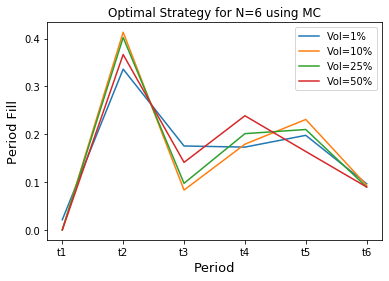

In [24]:
# Optimal Strategy for N=6
data = {'Vol=1%': [0.0213, 0.3361, 0.1754, 0.1731, 0.1977, 0.0965],
       'Vol=10%': [0, 0.4132, 0.0833, 0.1792, 0.2309, 0.0933],
       'Vol=25%': [0, 0.4021, 0.0974, 0.2012, 0.2099, 0.0895],
       'Vol=50%': [0, 0.3666, 0.1412, 0.2386, 0.1639, 0.0897]}
df = pd.DataFrame(data, index=['t1','t2','t3','t4','t5','t6'])

# Plot for Optimal Strategy when N=6
a = plt.plot(df)
plt.legend(a, df.columns)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=6 using MC')

Text(0.5, 1.0, 'Optimal Strategy for N=15 using MC')

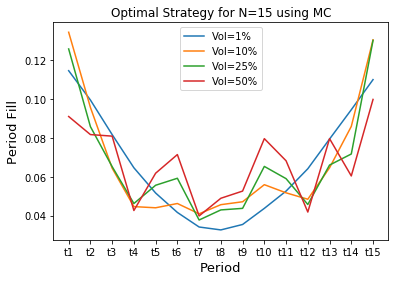

In [25]:
# Optimal Strategy for N=15
data = {'Vol=1%': [0.1146, 0.0995, 0.0817, 0.0646, 0.0516, 0.0416, 0.0341, 0.0326, 0.0354, 0.0437,
 0.0526, 0.0641, 0.0794, 0.0945, 0.11],
       'Vol=10%': [0.1344, 0.0957, 0.0644, 0.0446, 0.044,  0.0462, 0.0409, 0.0456, 0.0471, 0.0559,
 0.0517, 0.0484, 0.0646, 0.0859, 0.1305],
       'Vol=25%': [0.1258, 0.0858, 0.0652, 0.0462, 0.0556, 0.0592, 0.0377, 0.0429, 0.0437, 0.0653,
 0.059, 0.0457, 0.066,  0.0717, 0.1302],
       'Vol=50%': [0.091, 0.0817, 0.0809, 0.0426, 0.0618, 0.0714, 0.0398, 0.0489, 0.0526, 0.0796,
 0.0682, 0.0418, 0.0796, 0.0604, 0.0998]}
df=pd.DataFrame(data, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15'])

# Plot for Optimal Strategy when N=15
a = plt.plot(df)
plt.legend(a, df.columns)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=15 using MC')

Text(0.5, 1.0, 'Optimal Strategy for N=20 using MC')

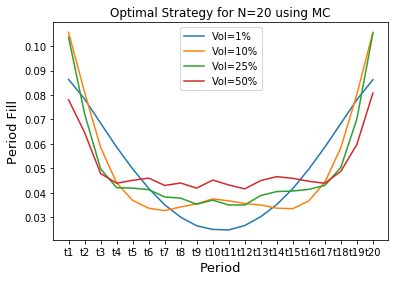

In [157]:
# Optimal Strategy for N=20
data = {'Vol=1%': [0.0864, 0.0784, 0.0685, 0.0587, 0.0498, 0.0418, 0.0351, 0.03, 0.0265, 0.025,
 0.0248, 0.0266, 0.0302, 0.0352, 0.0417, 0.0497, 0.0587, 0.0684, 0.0781, 0.0863],
       'Vol=10%': [0.1057, 0.0812, 0.0586, 0.0441, 0.0369, 0.0337, 0.0327, 0.0342, 0.0355, 0.0375,
 0.0367, 0.0356, 0.035,  0.0337, 0.0335, 0.0367, 0.0443, 0.0585, 0.0803, 0.1057],
       'Vol=25%': [0.1037, 0.0724, 0.0498, 0.0421, 0.0419, 0.0413, 0.0383, 0.0378, 0.0353, 0.037,
 0.035,  0.035,  0.0389, 0.0405, 0.0407, 0.0414, 0.043,  0.0504, 0.0702, 0.1053],
       'Vol=50%': [0.0781, 0.0647, 0.0479, 0.0439, 0.0451, 0.046,  0.043,  0.044,  0.0419, 0.0452,
 0.0432, 0.0416, 0.045,  0.0466, 0.0459, 0.0447, 0.0439, 0.0488, 0.0598, 0.0808]}
df=pd.DataFrame(data, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15','t16','t17','t18','t19','t20'])

# Plot for Optimal Strategy when N=20
a = plt.plot(df)
plt.legend(a, df.columns)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=20 using MC')

[0.0, 0.366, 0.1422, 0.2385, 0.1646, 0.0888]